# *Diabetes *

## Abstract & Summary

   According to CDC's National Diabetes Statistics Report, 10.5% (34.2 million people) of USA's total population had diabetes in 2018's records. When looking at the reports over the years, it is clear that the rate is increasing yearly. In 2000, the percentage of people with diabetes was 4.4%, which means that is has more than doubled over 18 years. This caught my attention and encouraged me to look into data about diabetes. The dataset contains information for 2000 individuals with details about each person's pregnancies, glucose, bloodpressure, skin thickness, insulin, BMY, diabetes pegdgree function, age, and outcome. With the dataset, I ran two different machine learning models, logistic regression and Decision Tree and tested to see which had the higher accuracy, with and without the outliers. The results showed that both models had higher accuracy when the outliers were removed, and the decision tree model had a much higher accuracy. For the different features, the correlation heat map showed that Glucose level had the highest influence on whether a patient had diabetes or not.

### Research Question: Diabetes prediction, which factor influences the cause of diabetes the most?
#### Data retrieved from: https://www.kaggle.com/johndasilva/diabetes

#### Related work
1. Center of Disease Control and Prevention (CDC). (2020). National Diabetes Statistics Report, 2020 . 
Retrieved from US department of Health and Human Services website:
https://www.cdc.gov/diabetes/pdfs/data/statistics/national-diabetes-statistics-report.pdf

2. Sisodia, D., & Sisodia, D. S. (2018). Prediction of diabetes using classification algorithms. 
Procedia Computer Science, 132, 1578-1585. doi:10.1016/j.procs.2018.05.122 

3. Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). 
Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. 
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). 
IEEE Computer Society Press. 

### 1. Importing Packages 


In [306]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import utils

### 2. Reading CSV file from Dataset to Dataframe

In order to use the data cvs found, we will have to read it in pandas to use it for our work. Below shows our dataframe.

In [308]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Here are some basic information about our data. Below shows the number of columns/obervations (2000), feature names and number of rows (9), and the type for each. Although our goal (outcome) is shown as int, it is either 0 or 1. We have a classifiacation dataset. 

In [309]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB
None


### 3. Data Cleaning

#### 3.1 Checking null values
As a first step of data cleaning, we will see if our data has any missing value. All the results came out false. This means that there are no null values/missing data in the dataset. 

In [310]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### 3.2 Checking outliers

We are going to see if there are any ouliers in our data. 

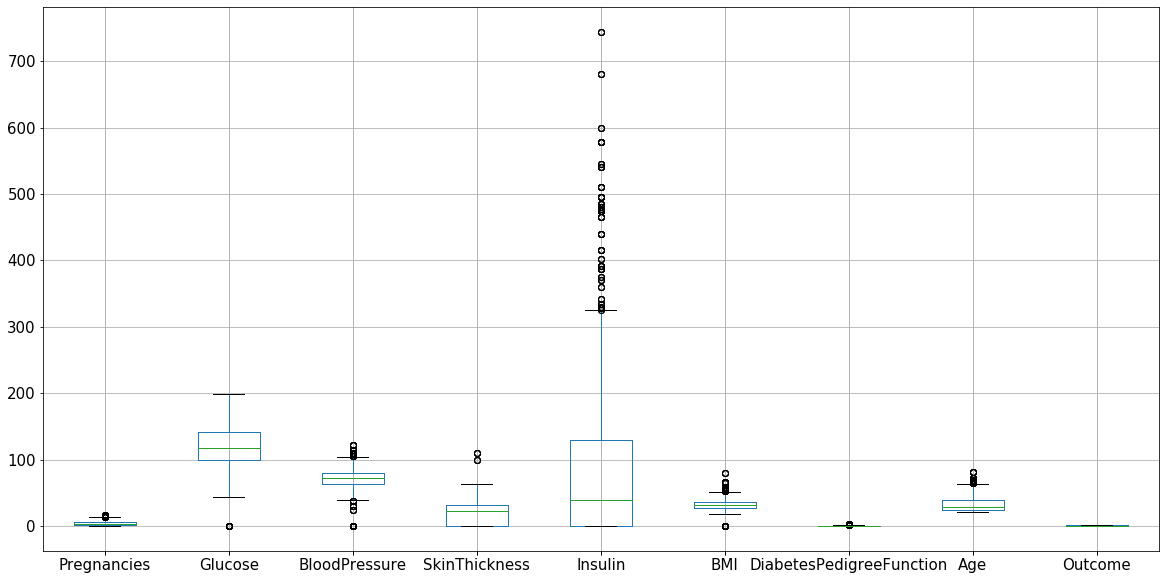

In [15]:
plt.figure(figsize=(20,10))
boxplot = df.boxplot(grid=True,  fontsize=15)
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

The dots represent outliers. It seems like there are outliers for all of the features have outliers. 'Outcome', which is our target, does not have any outliers becase it is either 1 or 0 where 1= yes the person has diabetes, and 0 = no the person does not have diabetes. 


#### 3.3 Features
For our dataset, we will use all features because they are all factors that can influence if a person has diabetes or not. 

### 4. Exploratory Data Analysis (Visualization & Correlation)

#### 4.1 Distribution Plot

Below shows the distribution chart for each features. 

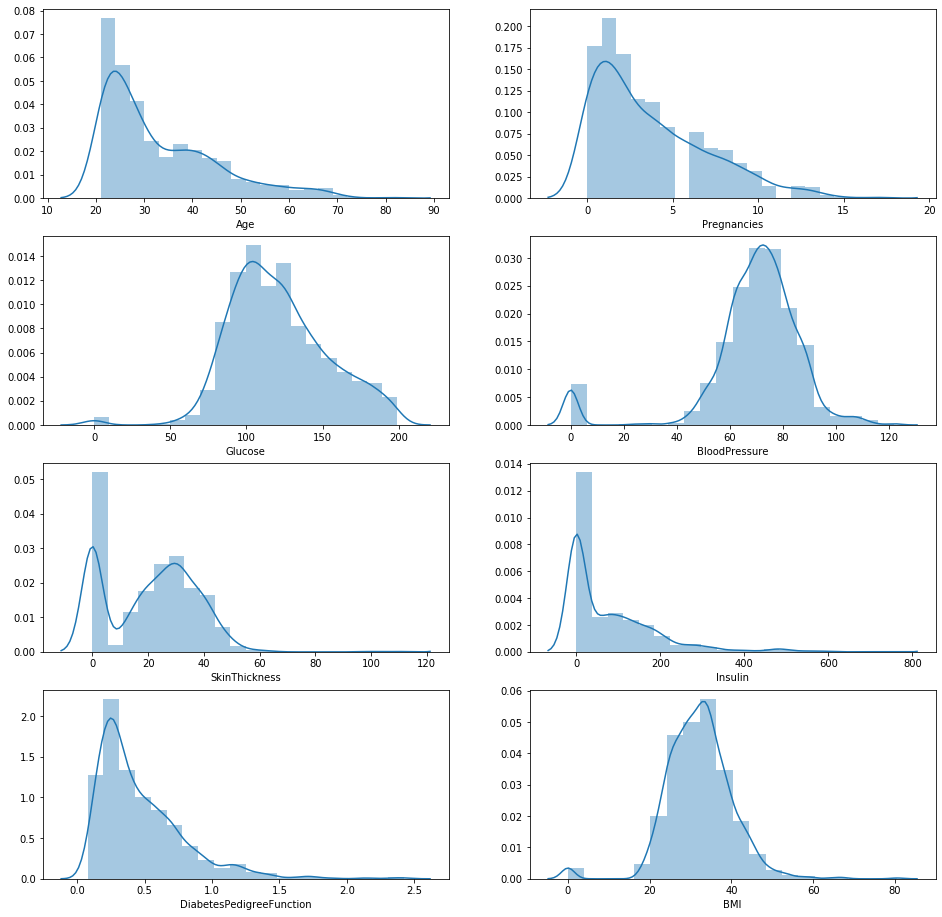

In [101]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 


C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


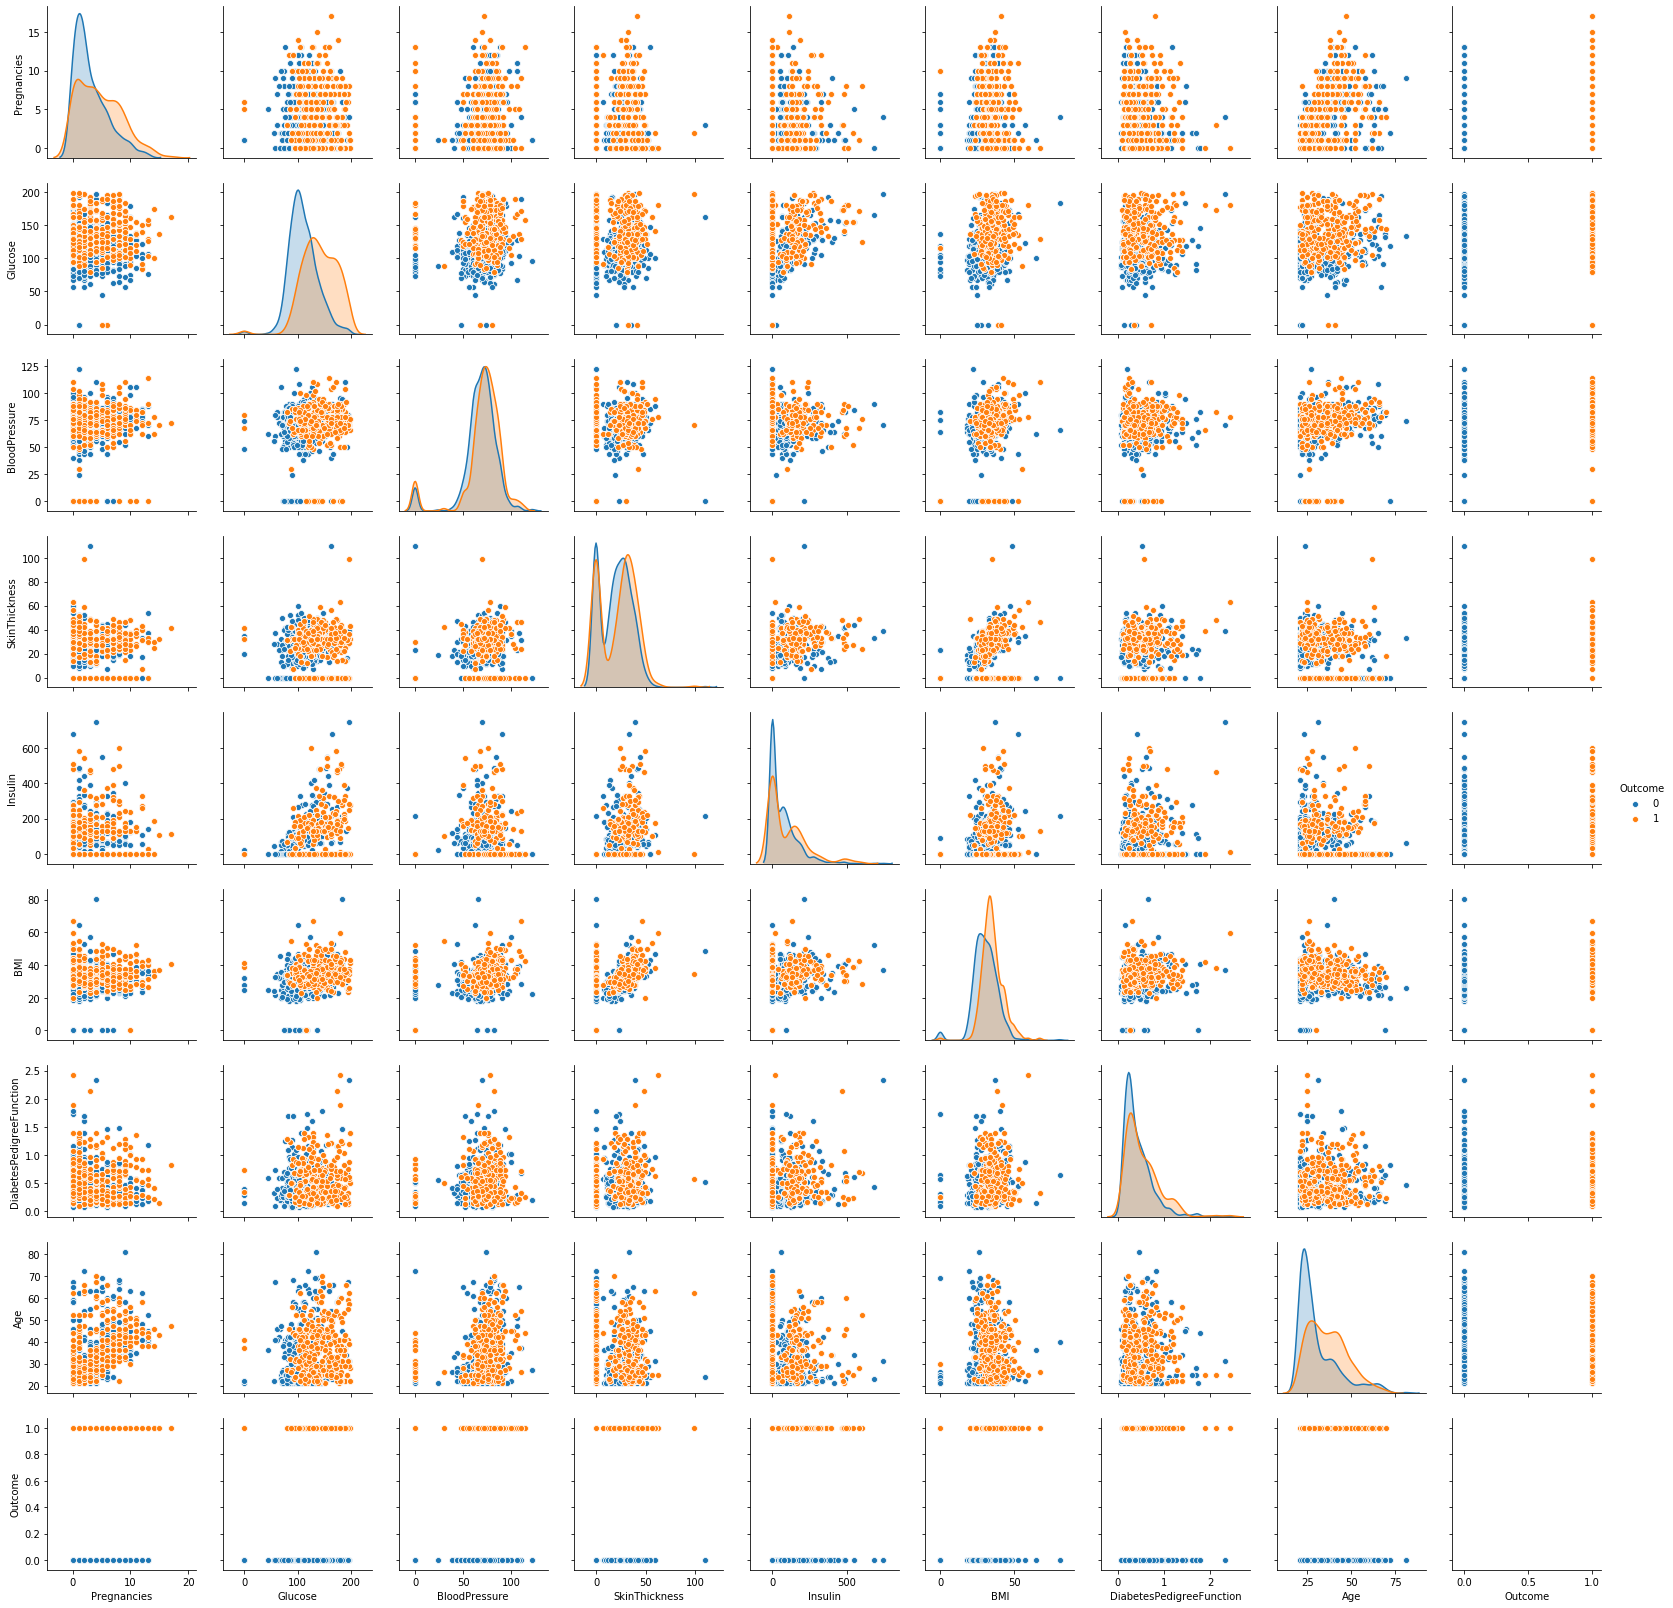

In [112]:
sns.pairplot(data=df,hue='Outcome')

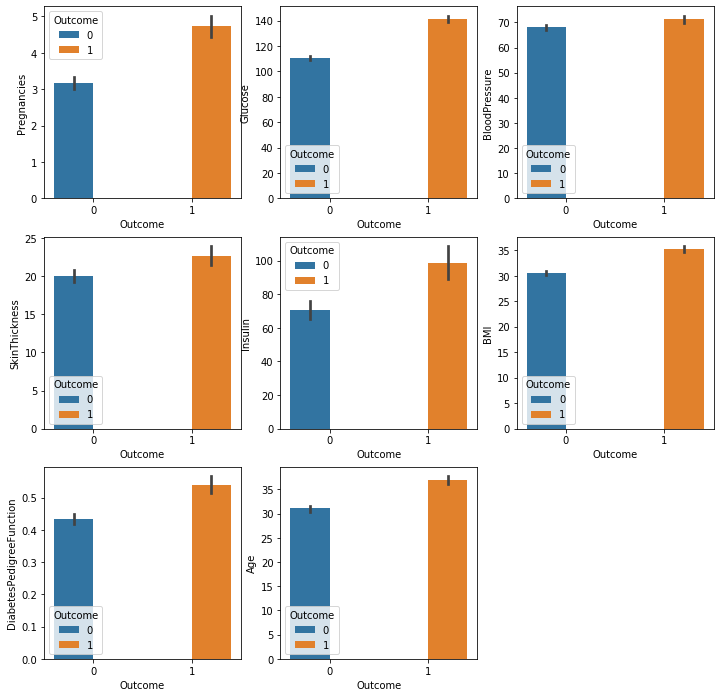

In [104]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Pregnancies',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='Insulin',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,7)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,8)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")

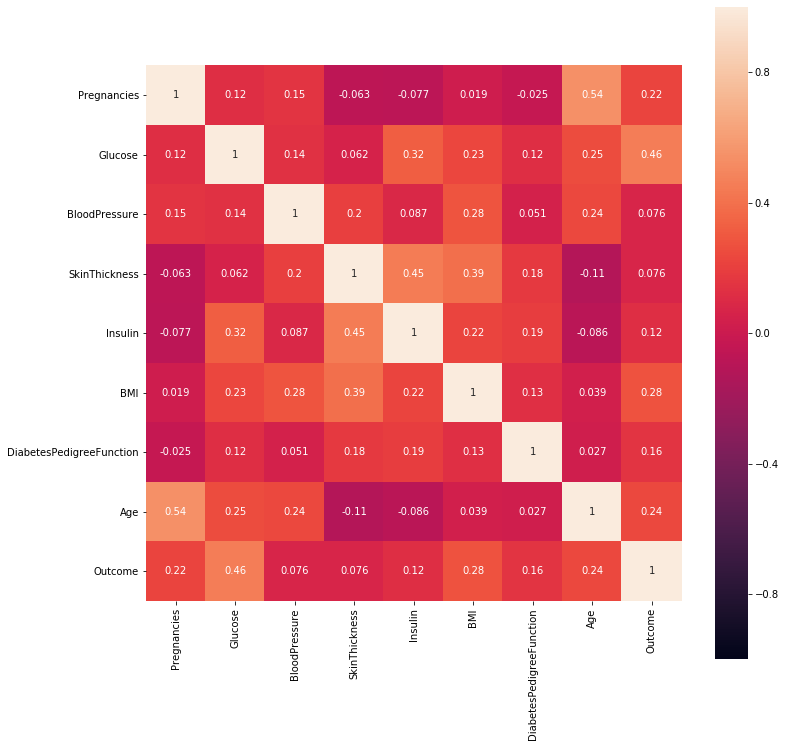

In [105]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

The heatmap is showing correlation between each features. When the number is closer to 1, it means that the correlation is high. It the number is closer to 0, it means that there is less correlation. The correlation betwwen self shows at 1.0 so we do not have to pay attention to self. Our results show that glucose has the highest correlation to the outcome with 0.46, BMI is the second highest with 0.28, and age is the third highest with 0.24.

### 5. Modeling 

#### 5.1 Logistic Regression 

Since we have a classification problem we will use logistic regression model.
The first step it to select features and set the independent variables (represented as X) and the dependent variable (represented as y):

In [311]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols] 
y = df.Outcome

Next, we split the data into training and testing datasets. We will set the test size to 0.25, which means the model testing will be based on 25% of the dataset, and the model training will be based on 75% of the dataset.

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [313]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Confusion Matrices and Assessing Performance

In [302]:
cfmatrix = metrics.confusion_matrix(y_test, y_pred)
cfmatrix

array([[285,  30],
       [ 54,  78]], dtype=int64)

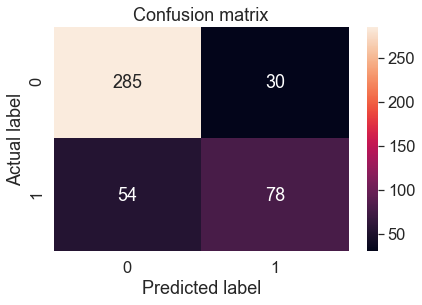

In [314]:
sns.heatmap(pd.DataFrame(cfmatrix), annot=True,fmt='2g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [247]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.782
Precision: 0.728
Recall: 0.5481927710843374


#### 5.2 Decision Tree 
Confusion Matrices and Assessing Performance

In [297]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [298]:
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.959731543624161


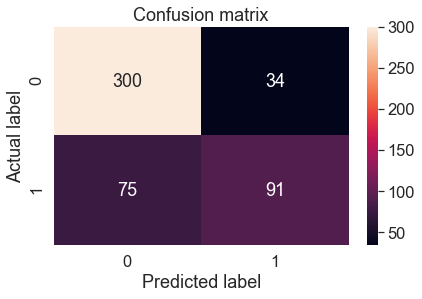

In [299]:
sns.heatmap(pd.DataFrame(cfmatrix), annot=True,fmt='2g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 6. Model Evaluation & Selection

#### 6.1 Removing outliers
To see if we can increase our accuracy, we will  be removing outliers. The new info shows that our dataset now has 1787 rows instead of 2000. 

In [272]:
from scipy import stats

new_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 1787 non-null int64
Glucose                     1787 non-null int64
BloodPressure               1787 non-null int64
SkinThickness               1787 non-null int64
Insulin                     1787 non-null int64
BMI                         1787 non-null float64
DiabetesPedigreeFunction    1787 non-null float64
Age                         1787 non-null int64
Outcome                     1787 non-null int64
dtypes: float64(2), int64(7)
memory usage: 139.6 KB
None


#### 6.2 Modeling with Removed outlier 
We will re-run our model with the new dataest (outliers removed)

1) Logistic Regression 

In [273]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = new_df[feature_cols] 
y = new_df.Outcome
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [275]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8120805369127517
Precision: 0.7222222222222222
Recall: 0.5909090909090909


Our new result is showing an accuracy of 0.812, which is higher than our previous accuracy (0.782). It would be more efficient to use the new dataset with the outliers removed. 

2) Decision Tree

In [292]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy is : ',acc)

Accuracy is :  0.970917225950783


Although the numbers did not change significantly, once again we have a higher accuracy when compared to the previous dataset with outliers.

### 7. Conclusion & Looking forward

Through the correlation heatmap, we were able to see that glucose had the highest correlation with our target goal, outcome. This means that a patient’s glucose level has the most influence on whether or not they have diabetes. For our machine learning models, both logistic regression model and decision tree model performed better when the outliers were removed. Also, decision tree model had a much higher accuracy of 0.968, and it would be the best model to use when predicting diabetes. It is important to keep the patients healthy all around, but doctors and the patients themselves should keep a more attention on their glucose level and BMI, especially for older patients, as they are the factors that can cause diabetes the most.

This project used machine learning algorithms learned only in class. Although the Decision tree model had a high accuracy, I would like to apply other models to compare the outcomes as I learn more techniques. Also, it would be interesting to investigate what kind of treatments or methods help patients lower the risk of diabetes, after finding related datasets.